## Trabalho Prático - Módulo 2

### Análise de tendências de locações de bicicletas

#### Descritivo dos dados coletados

---

- **rec_id:** índice do registro de locação; 
- **datetime:** data; 
- **season:** estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono). Relativo ao hemisfério norte; 
- **year:** ano (0: 2011, 1: 2012);
- **month:** mês (1 a 12); 
- **hour:** hora do dia (0 a 23); 
- **is_holiday:** booleano indicando feriado; 
- **weekday:** dia da semana (0: domingo, 1: segunda-feira, 2: terça-feira, 3: quarta-feira, 4: quinta-feira, 5: sexta-feira, 6: sábado); 
- **is_workingday:** booleano indicando dia útil; 
- **weather_condition:** (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte); 
- **temp:** Temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39; 
- **atemp:** Sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50; 
- **humidity:** Humidade relativa (0 a 1); 
- **windspeed:** Velocidade do vento escalada entre 0 e 1 (máximo original: 67); 
- **casual:** número de locações para usuários casuais; 
- **registered:** número de locações para usuários registrados; 
- **total_count:** contador total de aluguéis (casual + registered).

In [1]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 5)

In [2]:
# leitura do dataset
df_bike = pd.read_csv('bike-sharing.csv')

In [3]:
# apresentando as 5 primeiras linhas do dataset
df_bike.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   rec_id             17379 non-null  int64  
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [5]:
# convertendo a coluna datetime (string) para o tipo datetime
df_bike.datetime = pd.to_datetime(df_bike.datetime)

In [6]:
# verificando os tipos de variáveis e se existem ou não valores nulos
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   rec_id             17379 non-null  int64         
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [7]:
df_bike.dtypes.value_counts()

int64             12
float64            4
datetime64[ns]     1
dtype: int64

In [8]:
df_bike.isnull().sum()

datetime             0
rec_id               0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [9]:
# analisando a "estatística" do dataset
df_bike.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463030
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387644
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Qual o tamanho desse dataset (número de linhas, número de colunas)?

In [10]:
df_bike.shape

(17379, 17)

#### Qual a média da coluna windspeed?

In [11]:
df_bike[['windspeed']].mean()

windspeed    0.190098
dtype: float64

In [12]:
df_bike.windspeed.mean()

0.1900976063064631

#### Qual a média da coluna temp?

In [13]:
df_bike[['temp']].mean()

temp    0.496987
dtype: float64

In [14]:
df_bike.temp.mean()

0.4969871684216586

#### Quantos registros de locações existem para o ano de 2011 (número de linhas, número de colunas)?

In [15]:
df_bike[df_bike.year == 0].shape

(8645, 17)

In [16]:
df_bike[df_bike.datetime.dt.year == 2011].shape

(8645, 17)

#### Quantos registros de locações existem para o ano de 2012 (número de linhas, número de colunas)?

In [17]:
df_bike[df_bike.year == 1].shape

(8734, 17)

In [18]:
df_bike[df_bike.datetime.dt.year == 2012].shape

(8734, 17)

#### Quantas locações de bicicletas foram efetuadas em 2011?
#### Quantas locações de bicicletas foram efetuadas em 2012?

In [19]:
df_bike[df_bike.year == 0].total_count.sum()

1243103

In [20]:
df_bike[df_bike.year == 1].total_count.sum()

2049575

In [21]:
df_bike[df_bike.datetime.dt.year == 2011].total_count.sum()

1243103

In [22]:
df_bike[df_bike.datetime.dt.year == 2012].total_count.sum()

2049575

In [23]:
df_bike_onze = df_bike[df_bike.datetime.dt.year == 2011].total_count.sum()
df_bike_doze = df_bike[df_bike.datetime.dt.year == 2012].total_count.sum()
print(f'A quantidade de locações em 2011 foi de {df_bike_onze}')
print(f'A quantidade de locações em 2012 foi de {df_bike_doze}')

A quantidade de locações em 2011 foi de 1243103
A quantidade de locações em 2012 foi de 2049575


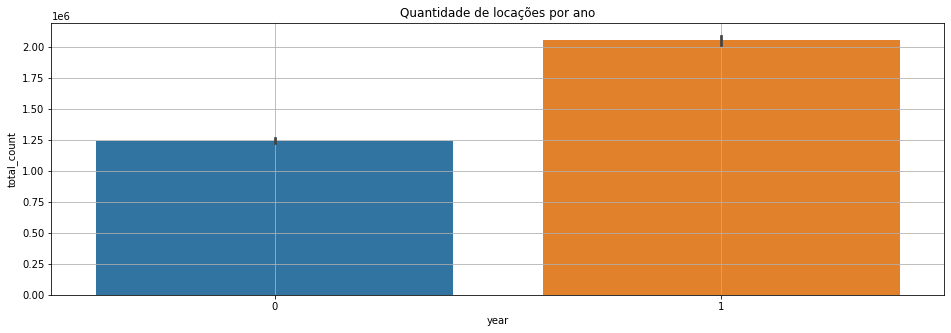

In [24]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="year", y="total_count", estimator = sum)
ax.set_title("Quantidade de locações por ano")
plt.grid()

#### Qual estação do ano contém a maior média de locações de bicicletas?
#### Qual estação do ano contém a menor média de locações de bicicletas?

In [25]:
# a estação do ano com a maior média ficará ordenado em 1º
df_bike.groupby(['season']).total_count.mean().sort_values(ascending = False)

season
3    236.016237
2    208.344069
4    198.868856
1    111.114333
Name: total_count, dtype: float64

In [26]:
# a estação do ano com a menor média ficará ordenado em 1º
df_bike.groupby(['season']).total_count.mean().sort_values(ascending = True)

season
1    111.114333
4    198.868856
2    208.344069
3    236.016237
Name: total_count, dtype: float64

In [27]:
df_media_season = df_bike.groupby(['season']).total_count.mean().reset_index(name = 'Media')
print(f'A maior média é a season {df_media_season[df_media_season.Media == df_media_season.Media.max()].season.iloc[0]}')
print(f'A menor média é a season {df_media_season[df_media_season.Media == df_media_season.Media.min()].season.iloc[0]}')
display(df_media_season)

A maior média é a season 3
A menor média é a season 1


,season,Media
0,1,111.114333
1,2,208.344069
2,3,236.016237
3,4,198.868856


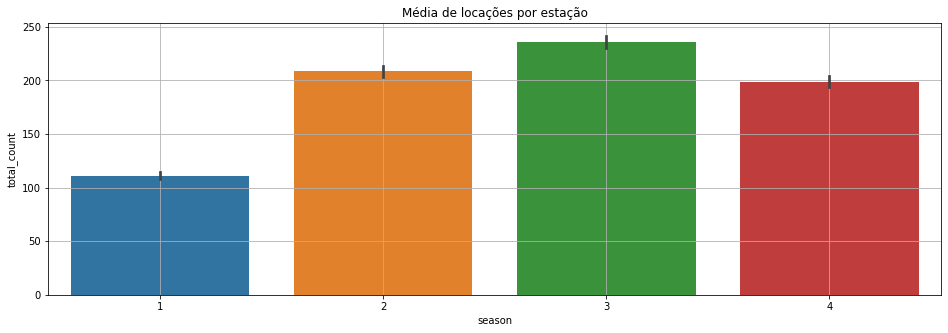

In [28]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="season", y="total_count")
ax.set_title("Média de locações por estação")
plt.grid()

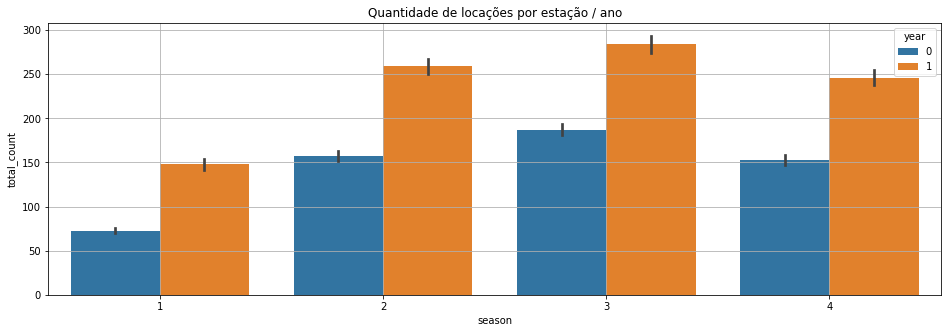

In [29]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="season", y="total_count", hue = 'year')
ax.set_title("Quantidade de locações por estação / ano")
plt.grid()

#### Qual horário do dia contém a maior média de locações de bicicletas?
#### Qual horário do dia contém a menor média de locações de bicicletas?

In [30]:
# o horário do dia com a maior média ficará ordenado em 1º
df_bike.groupby(['hour']).total_count.mean().sort_values(ascending = False)

hour
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.829670
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: total_count, dtype: float64

In [31]:
# o horário do dia com a menor média ficará ordenado em 1º
df_bike.groupby(['hour']).total_count.mean().sort_values(ascending = True)

hour
4       6.352941
3      11.727403
5      19.889819
2      22.869930
1      33.375691
0      53.898072
6      76.044138
23     87.829670
22    131.335165
21    172.314560
10    173.668501
11    208.143054
7     212.064649
9     219.309491
20    226.030220
14    240.949246
15    251.233196
12    253.315934
13    253.661180
19    311.523352
16    311.983562
8     359.011004
18    425.510989
17    461.452055
Name: total_count, dtype: float64

In [32]:
df_media_hora = df_bike.groupby(['hour']).total_count.mean().reset_index(name = 'Media')
print(f'A maior média é as {df_media_hora[df_media_hora.Media == df_media_hora.Media.max()].hour.iloc[0]} horas')
print(f'A menor média é as {df_media_hora[df_media_hora.Media == df_media_hora.Media.min()].hour.iloc[0]} horas')
display(df_media_hora)

A maior média é as 17 horas
A menor média é as 4 horas


,hour,Media
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


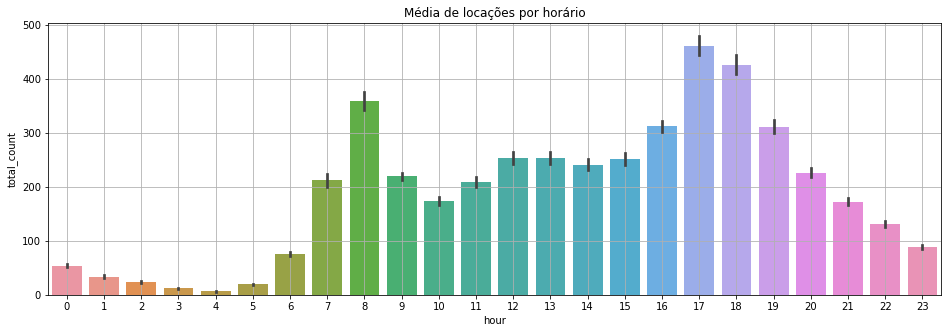

In [33]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="hour", y="total_count")
ax.set_title("Média de locações por horário")
plt.grid()

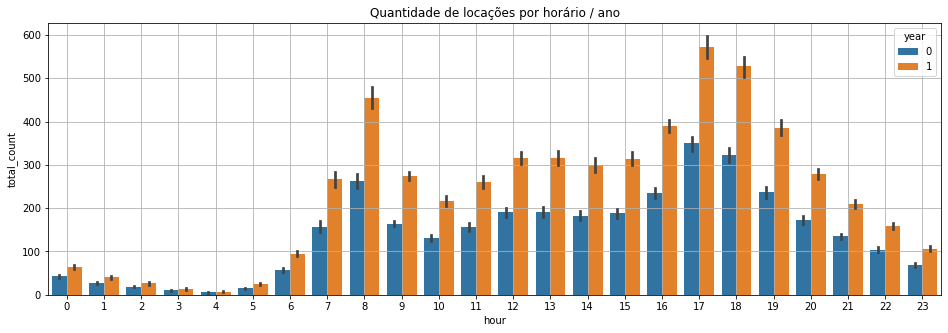

In [34]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="hour", y="total_count", hue = 'year')
ax.set_title("Quantidade de locações por horário / ano")
plt.grid()

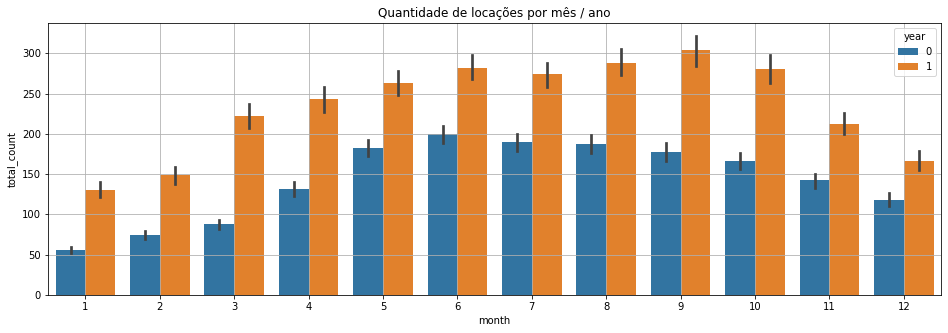

In [35]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="month", y="total_count", hue = 'year')
ax.set_title("Quantidade de locações por mês / ano")
plt.grid()

#### Que dia da semana contém a maior média de locações de bicicletas?
#### Que dia da semana contém a menor média de locações de bicicletas?

In [36]:
# o dia da semana com a maior média ficará ordenado em 1º
df_bike.groupby(['weekday']).total_count.mean().sort_values(ascending = False)

weekday
4    196.436665
5    196.135907
2    191.238891
3    191.130505
6    190.209793
1    183.744252
0    177.468825
Name: total_count, dtype: float64

In [37]:
# o dia da semana com a menor média ficará ordenado em 1º
df_bike.groupby(['weekday']).total_count.mean().sort_values(ascending = True)

weekday
0    177.468825
1    183.744252
6    190.209793
3    191.130505
2    191.238891
5    196.135907
4    196.436665
Name: total_count, dtype: float64

In [38]:
df_media_dia = df_bike.groupby(['weekday']).total_count.mean().reset_index(name = 'Media')
print(f'A maior média é no {df_media_dia[df_media_dia.Media == df_media_dia.Media.max()].weekday.iloc[0]} dia da semana')
print(f'A menor média é no {df_media_dia[df_media_dia.Media == df_media_dia.Media.min()].weekday.iloc[0]} dia da semana')
display(df_media_dia)

A maior média é no 4 dia da semana
A menor média é no 0 dia da semana


,weekday,Media
0,0,177.468825
1,1,183.744252
2,2,191.238891
3,3,191.130505
4,4,196.436665
5,5,196.135907
6,6,190.209793


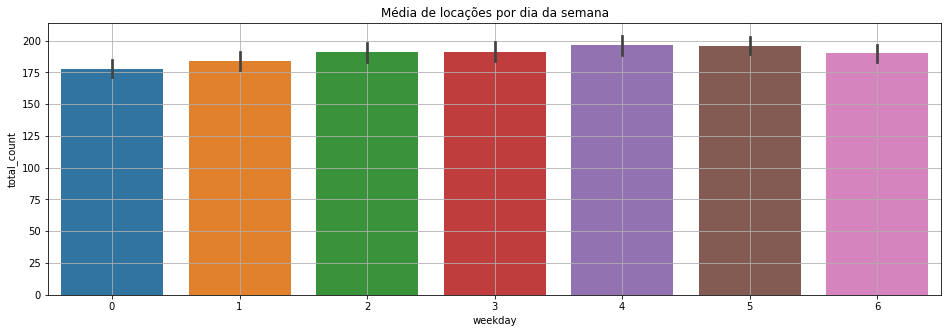

In [39]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="weekday", y="total_count")
ax.set_title("Média de locações por dia da semana")
plt.grid()

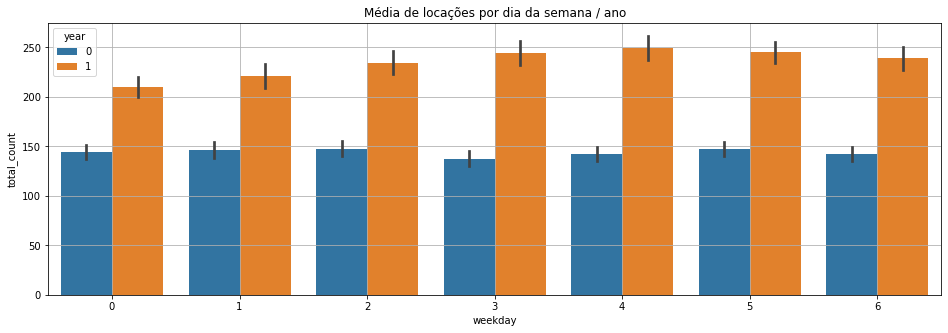

In [40]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike, x="weekday", y="total_count", hue = 'year')
ax.set_title("Média de locações por dia da semana / ano")
plt.grid()

#### Às quartas-feiras (weekday = 3), qual o horário do dia contém a maior média de locações de bicicletas?

In [41]:
# o horário com a maior média ficará ordenado em 1º
df_bike[df_bike.weekday == 3].groupby(['hour']).total_count.mean().sort_values(ascending = False)

hour
17    513.144231
18    494.029126
8     488.326923
19    357.504854
7     303.980769
16    272.961538
20    256.660194
9     238.528846
21    194.669903
12    193.903846
13    185.826923
15    181.288462
14    170.548077
11    152.201923
22    143.689320
10    131.894231
6     107.807692
23     83.737864
0      34.557692
5      25.750000
1      15.336538
2       7.813725
4       4.968750
3       4.888889
Name: total_count, dtype: float64

In [42]:
df_media_hora = df_bike[df_bike.weekday == 3].groupby(['hour']).total_count.mean().reset_index(name = 'Media')
print(f'A maior média é as {df_media_hora[df_media_hora.Media == df_media_hora.Media.max()].hour.iloc[0]} horas')
print(f'A menor média é as {df_media_hora[df_media_hora.Media == df_media_hora.Media.min()].hour.iloc[0]} horas')
display(df_media_hora)

A maior média é as 17 horas
A menor média é as 3 horas


,hour,Media
0,0,34.557692
1,1,15.336538
2,2,7.813725
3,3,4.888889
4,4,4.968750
5,5,25.750000
6,6,107.807692
7,7,303.980769
8,8,488.326923
9,9,238.528846


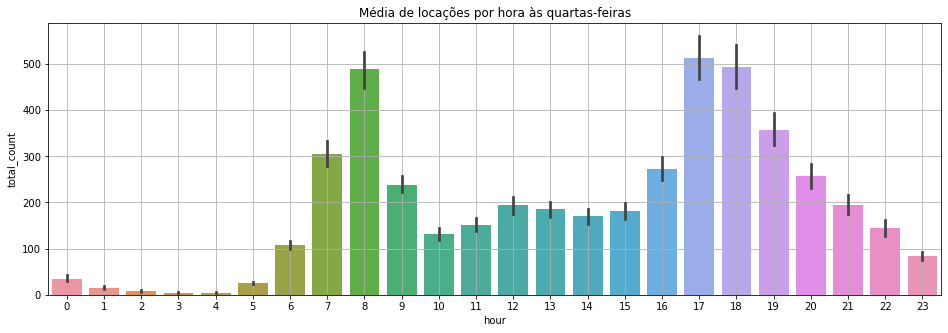

In [43]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike[df_bike.weekday == 3], x="hour", y="total_count")
ax.set_title("Média de locações por hora às quartas-feiras")
plt.grid()

#### Aos sábados (weekday = 6), qual o horário do dia contém a maior média de locações de bicicletas?

In [44]:
# o horário com a maior média ficará ordenado em 1º
df_bike[df_bike.weekday == 6].groupby(['hour']).total_count.mean().sort_values(ascending = False)

hour
13    385.371429
15    382.428571
14    381.333333
12    375.380952
16    366.142857
17    334.409524
11    328.609524
18    292.048077
10    263.723810
19    239.932692
9     186.790476
20    180.865385
21    156.000000
22    139.663462
23    115.855769
8     114.476190
0      94.304762
1      67.780952
2      50.495238
7      45.961905
3      22.885714
6      21.000000
5       8.291262
4       7.657143
Name: total_count, dtype: float64

In [45]:
df_media_hora = df_bike[df_bike.weekday == 6].groupby(['hour']).total_count.mean().reset_index(name = 'Media')
print(f'A maior média é as {df_media_hora[df_media_hora.Media == df_media_hora.Media.max()].hour.iloc[0]} horas')
print(f'A menor média é as {df_media_hora[df_media_hora.Media == df_media_hora.Media.min()].hour.iloc[0]} horas')
display(df_media_hora)

A maior média é as 13 horas
A menor média é as 4 horas


,hour,Media
0,0,94.304762
1,1,67.780952
2,2,50.495238
3,3,22.885714
4,4,7.657143
5,5,8.291262
6,6,21.000000
7,7,45.961905
8,8,114.476190
9,9,186.790476


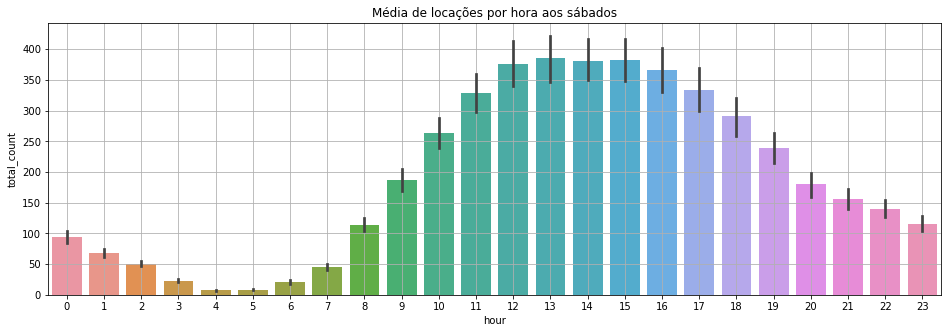

In [46]:
fig, ax = plt.subplots()
sns.barplot(data = df_bike[df_bike.weekday == 6], x="hour", y="total_count")
ax.set_title("Média de locações por hora aos sábados")
plt.grid()